In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('results/accuracy.csv', index_col=None)
df = df.rename(columns={'detector': 'Algorithm', 'distance': 'Dissimilarity'})
df.head()

,world file,Algorithm,Dissimilarity
0,star,Convolutional-(16x16),2.537196
1,star,Convolutional-(32x32),4.692734
2,star,Convolutional-(64x64),8.078802
3,star,Convolutional-(128x128),13.127660
4,star,Simple,43.265432


In [22]:
name_lookup = {'star': 'Star', 'large-field-large-explored': 'Large (Majority)', 'large-field-medium-explored': 'Large (Partial)', 'medium-field-large-explored': 'Medium (Majority)', 'medium-field-medium-explored': 'Medium (Partial)'}

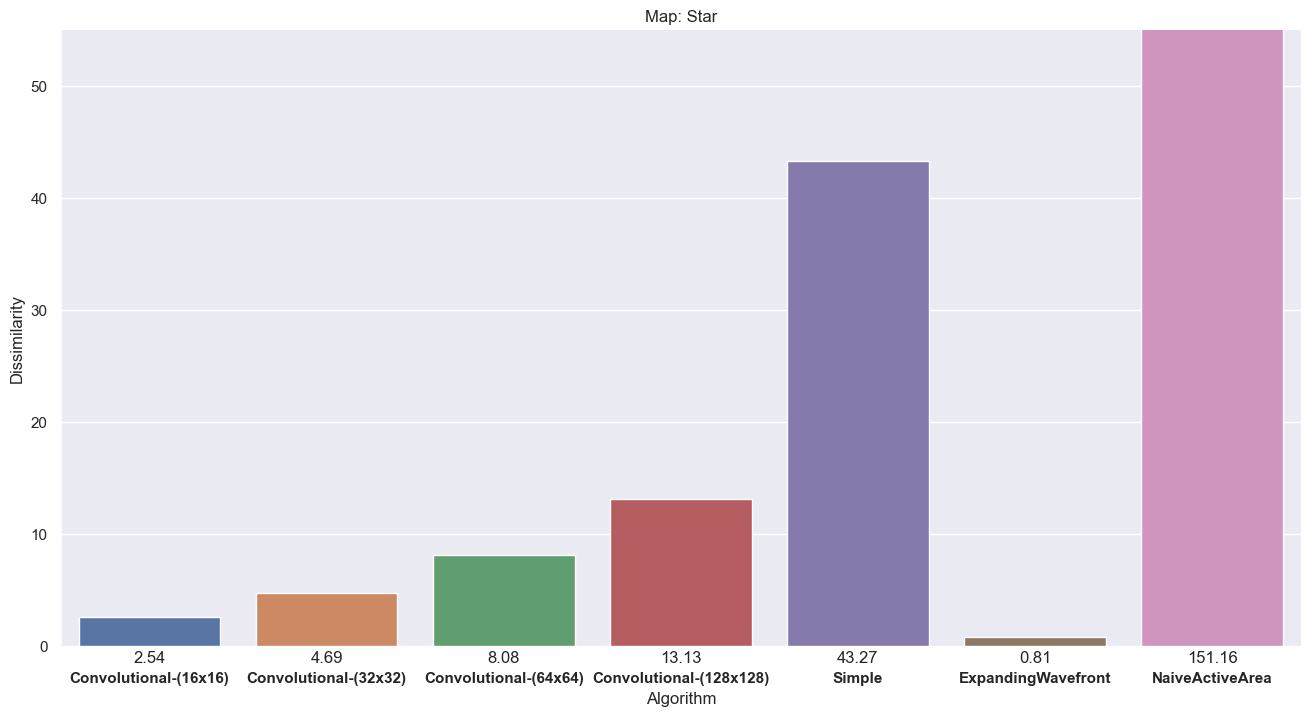

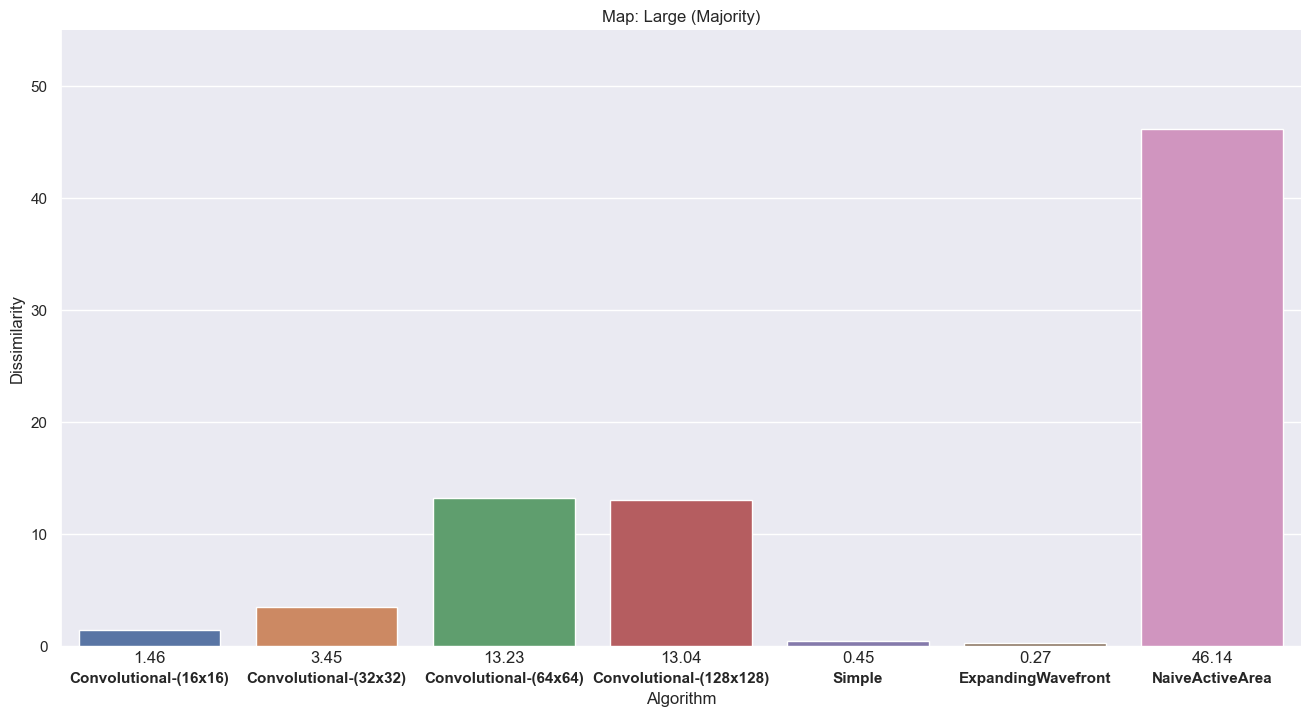

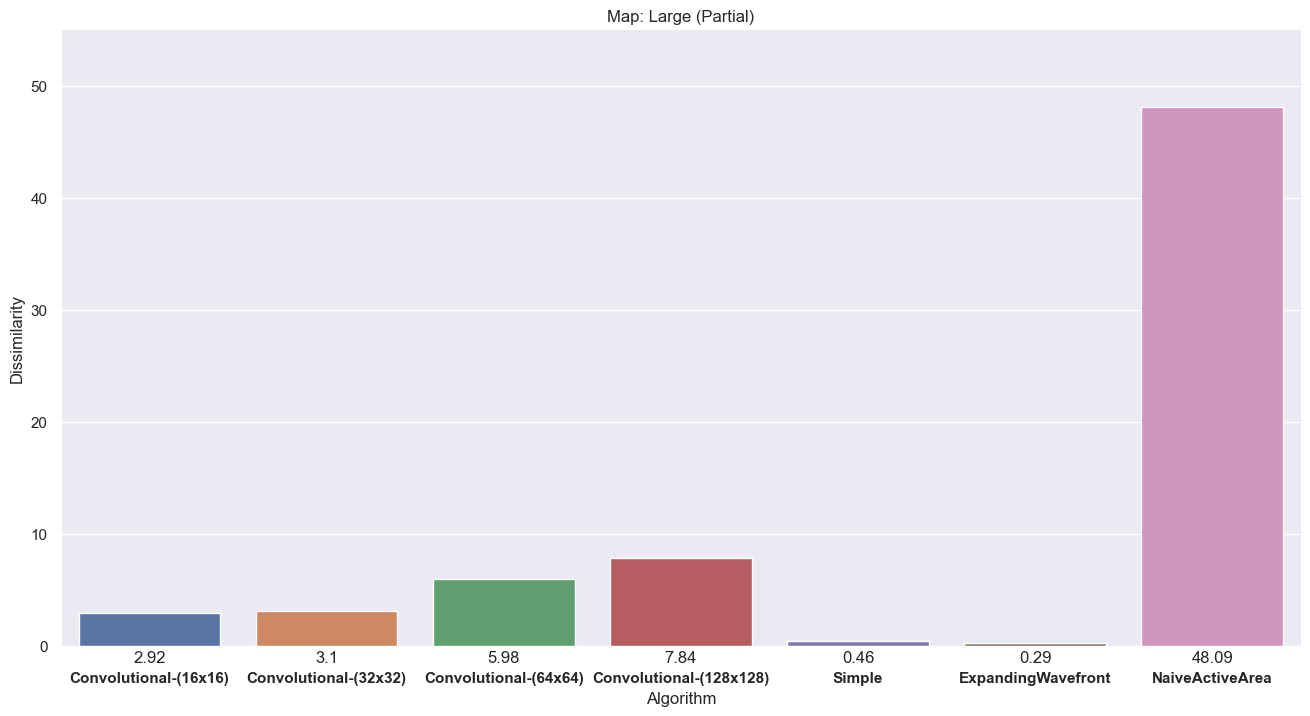

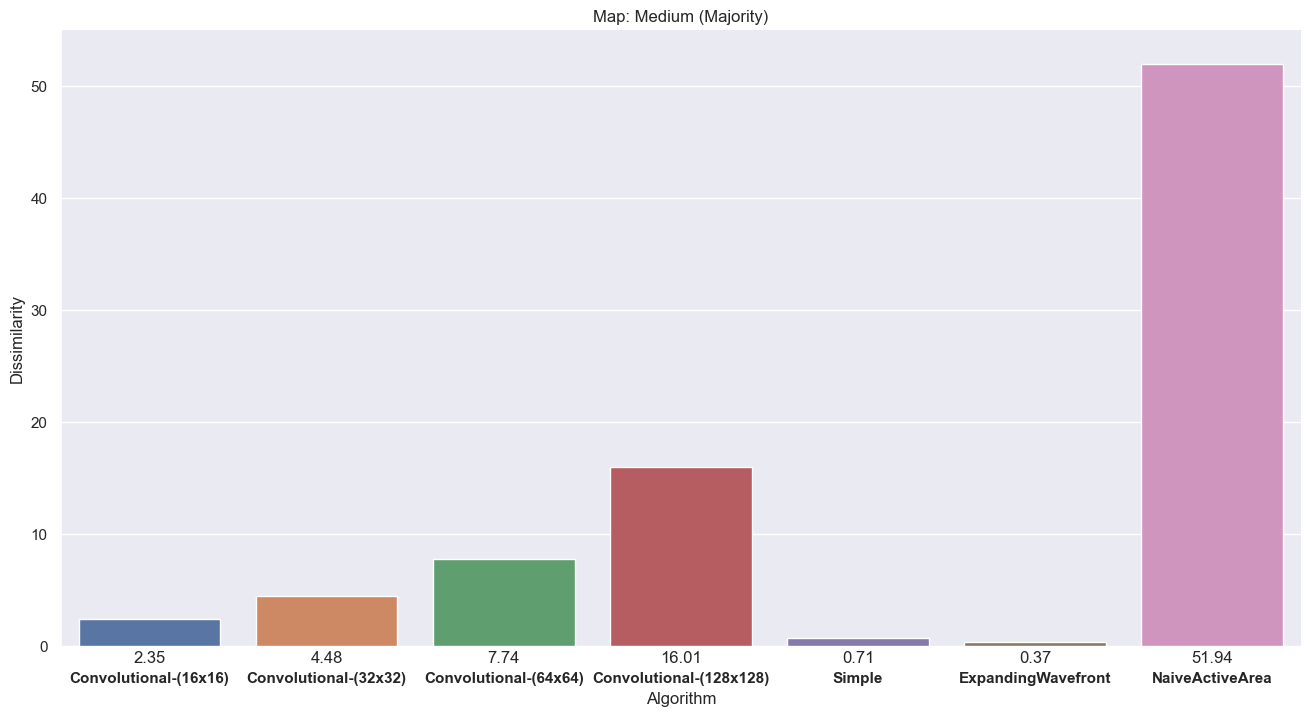

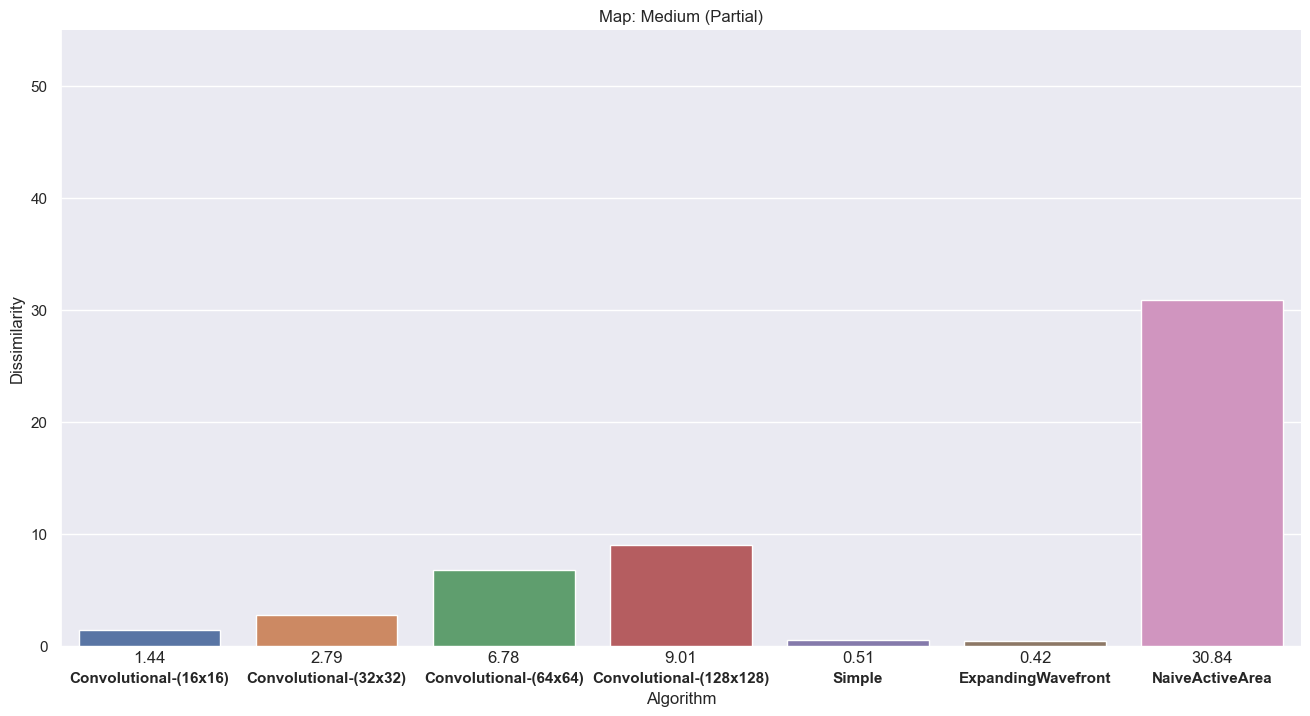

In [45]:
world_files = df['world file'].unique()

for world_file in world_files:
    df_subset = df[df['world file'] == world_file]

    plt.ylim(0, 55)
    sns.set(rc={"figure.figsize": (16, 8)})
    ax = sns.barplot(x='Algorithm', y='Dissimilarity', data=df_subset)
    for j in range(7):
        ax.xaxis.get_majorticklabels()[j].set_y(-0.02)
    # ax.bar_label(ax.containers[0], label_type='edge')
    for index, row in df_subset.iterrows():
        plt.text(index % 7, -1.5, round(row['Dissimilarity'], 2), ha='center')
    plt.xticks(weight="bold")
    ax.set(title=f'Map: {name_lookup[world_file]}')
    sns.despine(bottom=True)
    plt.show()
